In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import nltk

In [3]:
from nltk.util import ngrams, bigrams, trigrams
from nltk.tokenize import word_tokenize,sent_tokenize

In [4]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

In [5]:
print(dataset.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [6]:
documents=dataset.data
print("# of Documents",len(documents))
print("Categories",dataset.target_names)

# of Documents 11314
Categories ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [7]:
news_df=pd.DataFrame({'document':documents})
print(news_df.head)
print(news_df.iloc[0]['document'])

<bound method NDFrame.head of                                                 document
0      Well i'm not sure about the story nad it did s...
1      \n\n\n\n\n\n\nYeah, do you expect people to re...
2      Although I realize that principle is not one o...
3      Notwithstanding all the legitimate fuss about ...
4      Well, I will have to change the scoring on my ...
...                                                  ...
11309  Danny Rubenstein, an Israeli journalist, will ...
11310                                                 \n
11311  \nI agree.  Home runs off Clemens are always m...
11312  I used HP DeskJet with Orange Micros Grappler ...
11313                                        ^^^^^^\n...

[11314 rows x 1 columns]>
Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I rea

In [21]:
news_df['tokenized']  = news_df['document'].map(lambda x : (word_tokenize(x)))
news_df['bigrams']  = news_df['document'].map(lambda x : list(bigrams(word_tokenize(x))))

print(news_df['tokenized'].head)
print(news_df['bigrams'].head)


<bound method NDFrame.head of 0        [Well, i, 'm, not, sure, about, the, story, na...
1        [Yeah, ,, do, you, expect, people, to, read, t...
2        [Although, I, realize, that, principle, is, no...
3        [Notwithstanding, all, the, legitimate, fuss, ...
4        [Well, ,, I, will, have, to, change, the, scor...
                               ...                        
11309    [Danny, Rubenstein, ,, an, Israeli, journalist...
11310                                                   []
11311    [I, agree, ., Home, runs, off, Clemens, are, a...
11312    [I, used, HP, DeskJet, with, Orange, Micros, G...
11313    [^^^^^^, No, argument, at, all, with, Murphy, ...
Name: tokenized, Length: 11314, dtype: object>
<bound method NDFrame.head of 0        [(Well, i), (i, 'm), ('m, not), (not, sure), (...
1        [(Yeah, ,), (,, do), (do, you), (you, expect),...
2        [(Although, I), (I, realize), (realize, that),...
3        [(Notwithstanding, all), (all, the), (the, leg...
4       

0        172
1        123
2        137
3        201
4         81
        ... 
11309     52
11310      0
11311     24
11312     58
11313    297
Name: tokens_len, Length: 11314, dtype: int64
0
35955


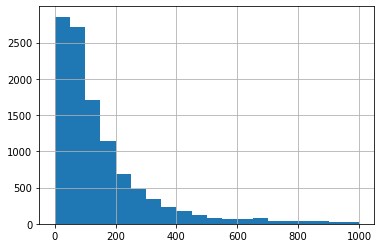

In [10]:
#Num Tokens Hist
news_df['tokens_len']=news_df.tokenized.apply(len)
print(news_df['tokens_len'])
news_df['tokens_len'].hist(range = (0,1000),bins=20)
print(news_df['tokens_len'].min())
print(news_df['tokens_len'].max())

0        171
1        122
2        136
3        200
4         80
        ... 
11309     51
11310      0
11311     23
11312     57
11313    296
Name: bigrams_len, Length: 11314, dtype: int64
0
35954


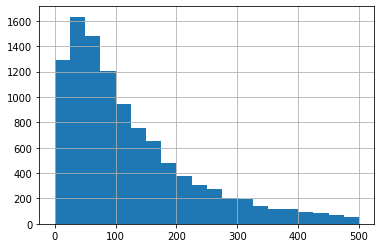

In [18]:
#Bigram Hist
news_df['bigrams_len']=news_df.bigrams.apply(len)
print(news_df['bigrams_len'])
news_df['bigrams_len'].hist(range = (0,500),bins=20)
print(news_df['bigrams_len'].min())
print(news_df['bigrams_len'].max())

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
vectorizer = CountVectorizer()

cv_tokenizer=vectorizer.build_tokenizer()

In [13]:
# Turn DF into List
news_docs=news_df.document.tolist()

In [16]:
# CountVectorizer Tokenization Example
print(news_docs[0])
print(cv_tokenizer(news_docs[0])[:15])

Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.

['Well', 'not', 'sure', 'about', 'the', 'story', 'nad', 'it', 'did', 'seem', 'biased', 'What', 'disagree', 'with', 'is']


In [17]:
#Term-Document Matrix
X=vectorizer.fit_transform(news_docs)
print(X.shape)

(11314, 101631)


In [23]:
#Counter Based
#Get tokenized list
nltk_tokenized_data=news_df.tokenized.tolist()
print(nltk_tokenized_data[:5])


[['Well', 'i', "'m", 'not', 'sure', 'about', 'the', 'story', 'nad', 'it', 'did', 'seem', 'biased', '.', 'What', 'I', 'disagree', 'with', 'is', 'your', 'statement', 'that', 'the', 'U.S.', 'Media', 'is', 'out', 'to', 'ruin', 'Israels', 'reputation', '.', 'That', 'is', 'rediculous', '.', 'The', 'U.S.', 'media', 'is', 'the', 'most', 'pro-israeli', 'media', 'in', 'the', 'world', '.', 'Having', 'lived', 'in', 'Europe', 'I', 'realize', 'that', 'incidences', 'such', 'as', 'the', 'one', 'described', 'in', 'the', 'letter', 'have', 'occured', '.', 'The', 'U.S.', 'media', 'as', 'a', 'whole', 'seem', 'to', 'try', 'to', 'ignore', 'them', '.', 'The', 'U.S.', 'is', 'subsidizing', 'Israels', 'existance', 'and', 'the', 'Europeans', 'are', 'not', '(', 'at', 'least', 'not', 'to', 'the', 'same', 'degree', ')', '.', 'So', 'I', 'think', 'that', 'might', 'be', 'a', 'reason', 'they', 'report', 'more', 'clearly', 'on', 'the', 'atrocities', '.', 'What', 'is', 'a', 'shame', 'is', 'that', 'in', 'Austria', ',', 'da

In [24]:
from collections import Counter
count=Counter(nltk_tokenized_data)

TypeError: unhashable type: 'list'

In [40]:
#Remove Punctutation, Stop Words
import string
from nltk.corpus import stopwords

def remove_punctuation(text):
    tokens=word_tokenize(text)
    no_punct=[words for words in tokens if words not in string.punctuation]
    words_wo_punct=' '.join(no_punct)
    # no_punct=[words for words in text if words not in string.punctuation]
    # words_wo_punct=''.join(no_punct)
    return words_wo_punct

def remove_stopwords(text):
    tokens=word_tokenize(text)
    no_stop=[word for word in tokens if word not in set(stopwords.words('english'))]
    words_wo_stop=' '.join(no_stop)
    return words_wo_stop


In [ ]:
#Remove Punctuation
news_df['document_no_punct']=news_df['document'].apply(lambda x: remove_punctuation(x))

In [47]:
#Remove Stopwords
news_df['document_no_stop']=news_df['document_no_punct'].apply(lambda x: remove_stopwords(x))

In [41]:
# news_df['document_no_punct_tokenized']  = news_df['document_no_punct'].map(lambda x : (word_tokenize(x)))
news_df['document_no_punct_tokenized']  = news_df['document_no_punct'].map(lambda x : (x.split()))
nltk_tokenized_data=news_df.document_no_punct_tokenized.tolist()

In [ ]:
news_df['document_no_stop_tokenized']  = news_df['document_no_stop'].map(lambda x : (x.split()))
nltk_tokenized_data=news_df.document_no_punct_tokenized.tolist()

[('the', 94647), ("'AX", 61725), ('--', 61024), ('to', 51801), ('of', 45912), ('a', 40487), ('and', 40042), ('I', 33786), ('is', 29742), ('in', 28417), ('that', 26724), ("''", 22729), ('it', 19060), ('for', 18500), ('``', 18401), ('you', 15977), ('on', 13585), ('be', 13581), ('have', 12915), ('are', 12869), ('with', 12309), ('not', 12144), ('this', 11179), ("'s", 10928), ('The', 10864), ('as', 10152), ('or', 9864), ("n't", 9820), ('was', 9635), ('do', 8579), ('by', 7758), ('from', 7684), ('but', 7632), ('they', 7593), ('at', 7156), ('can', 6919), ('an', 6915), ('will', 6440), ('would', 6338), ('1', 5849), ('if', 5770), ('about', 5607), ('all', 5563), ('one', 5509), ('X', 5412), ('my', 5291), ('has', 5277), ('there', 5055), ('your', 4949), ('we', 4804)]


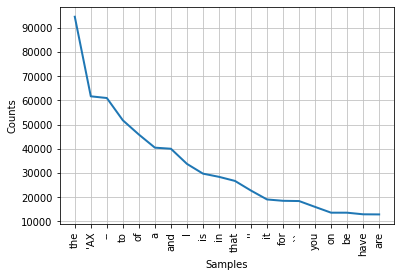

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [42]:
from nltk.probability import FreqDist
fdist = FreqDist([word for sent in nltk_tokenized_data for word in sent])
top_ten = fdist.most_common(50)
print(top_ten)

fdist.plot(20)

In [45]:
import seaborn as sns

def analyse_most_common(fdist,n):
    mostcommon_words= fdist.most_common(n)
    y=[]
    x=[]
    for word,count in mostcommon_words:
        #Word longer thatn 2 characters
        if len(word)>2:
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)

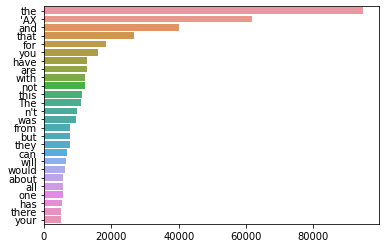

In [46]:
analyse_most_common(fdist,50)